<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-библиотек-и-модулей" data-toc-modified-id="Подключение-библиотек-и-модулей-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение библиотек и модулей</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Создание-функций-для-формирования-выборок-и-обучения-модели" data-toc-modified-id="Создание-функций-для-формирования-выборок-и-обучения-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Создание функций для формирования выборок и обучения модели</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-формирования-выборок" data-toc-modified-id="Создание-функции-для-формирования-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для формирования выборок</a></span></li><li><span><a href="#Создание-функции-для-формирования-и-обучения-модели" data-toc-modified-id="Создание-функции-для-формирования-и-обучения-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание функции для формирования и обучения модели</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Формирование-обучающей-и-тестовой-выборок" data-toc-modified-id="Формирование-обучающей-и-тестовой-выборок-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Формирование обучающей и тестовой выборок</a></span></li><li><span><a href="#Формирование-и-обучение-модели" data-toc-modified-id="Формирование-и-обучение-модели-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Формирование и обучение модели</a></span></li></ul></li><li><span><a href="#Анализ-обученной-модели" data-toc-modified-id="Анализ-обученной-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ обученной модели</a></span></li></ul></div>

# Определение возраста покупателей по фотографии

## Подключение библиотек и модулей

In [1]:
# Подключение необходимых библиотек, модулей и функций
import pathlib
from pathlib import Path
from PIL import Image

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

## Исследовательский анализ данных

In [2]:
# Открытие датасета labels.csv
try:
    df = pd.read_csv('/datasets/labels.csv')
    display(df.head())
except:
    df = pd.read_csv(
        Path(
            pathlib.Path.cwd(),
            'datasets',
            'labels.csv'
            )
        )
    display(df.head())

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [3]:
# Вывод общей информации о df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
# Поиск явных дубликатов
df.duplicated().sum()

0

<div class="alert alert-block alert-warning">
<span style="color:green"><font size="3" face="Arial"><b>Промежуточные выводы 2.1:<b/></span><br>
    <br>
<span style="color:steelblue"><font size="3" face="Courier"><b>1. Датафрейм <code>df</code> содержит <code>7591</code> строку и <code>2</code> колонки.<br>
    2. Наименование колонок выполнено с соблюдением змеиного стиля.<br>
    3. Явные дубликаты не обнаружены.<br>
    4. Колонка <code>file_name</code> имеет строковый тип данных и содержит названия файлов с фотографиями людей.<br>
    5. Колонка <code>real_age</code> содержит целевые признаки (ответы) с числовыми значениями возраста людей, следовательно, решается задача <code>регрессии</code>.</b></span></div>

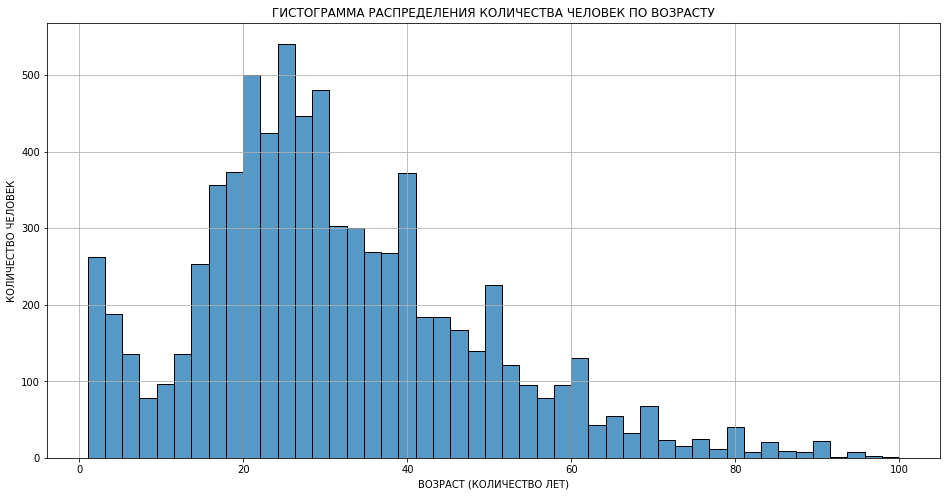

In [5]:
# Построение графика распределения возраста
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='real_age', stat='count')
plt.xlabel('возраст (количество лет)'.upper())
plt.ylabel('количество человек'.upper())
plt.title('гистограмма распределения количества человек по возрасту'.upper())
plt.grid()
plt.show()

In [6]:
# Вывод списка характерных значений в df['real_age']
df['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

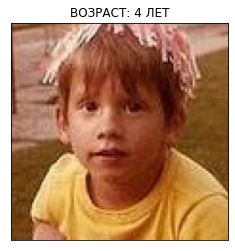

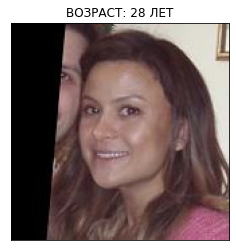

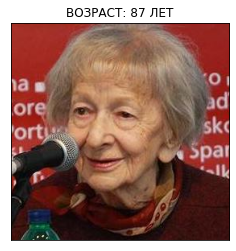

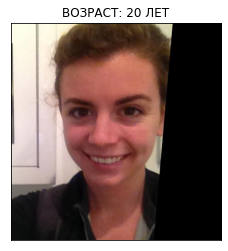

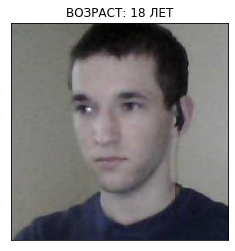

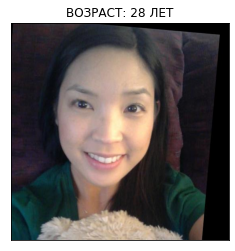

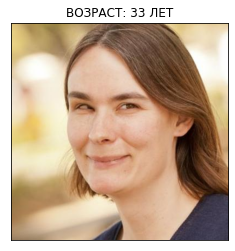

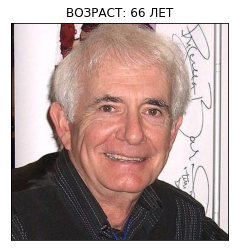

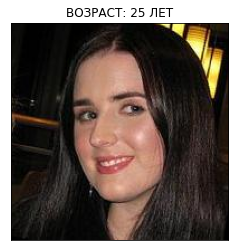

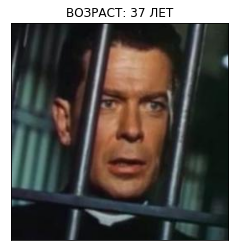

In [7]:
# Вывод 10 фотографий на экран
for j in range(0, len(df), len(df) // 9):
    plt.imshow(Image.open(Path(pathlib.Path.cwd(), 'datasets/faces/', f'{df.file_name[j]}')))
    plt.title(f'ВОЗРАСТ: {df.real_age[j]} ЛЕТ')
    plt.xticks([])
    plt.yticks([])
    plt.show()

<div class="alert alert-block alert-warning">
<span style="color:green"><font size="3" face="Arial"><b>Промежуточные выводы 2.2:<b/></span><br>
    <br>
<span style="color:steelblue"><font size="3" face="Courier"><b>В датасете содержатся фотографии людей <code>мужского</code> и <code>женского</code> полов в возрасте от <code>1</code> до <code>100</code> лет.<br>
    Основной возраст покупателей находится в диапазоне от <code>14</code> до <code>70</code> лет.<br>
    Данные скошены вправо, что говорит о смещении медианного значения левее относительно среднего арифметического. Средний возраст покупателя составляет <code>31</code> год.<br>
    Возраст покупателей за чертой <code>70</code> лет будет являться выбросами в виду маленького количества таких покупателей. Аналогично дело обстоит и с клиентами младше <code>5</code> лет, которые не могут самостоятельно приобретать товары без присутствия взрослых.</b></span></div>

## Создание функций для формирования выборок и обучения модели

### Создание функции для формирования выборок

In [8]:
# Создание функции для формирования обучающей выборки
# 1. Объявление функции
def load_train(data_input, path, x_name, y_name, split=.25):
    # 2. Формирование структуры загручика данных
    datagen = ImageDataGenerator(
        validation_split=split,
        rescale=1. / 255,
        horizontal_flip=True
    )
    # 3. Формирование обучающей выборки с признаками и целевыми признаками
    train = datagen.flow_from_dataframe(
        dataframe=data_input,
        directory=path,
        x_col=x_name,
        y_col=y_name,
        target_size=(224, 224),
        batch_size=8,
        class_mode='raw',
        subset='training',
        shuffle=True,
        validate_filenames=True,
        seed=777
    )
    # 4. Возвращение функции
    return train

In [9]:
# Создание функции для формирования обучающей выборки
# 1. Объявление функции
def load_test(data_input, path, x_name, y_name, split=.25):
    # 2. Формирование структуры загручика данных
    datagen = ImageDataGenerator(
        validation_split=split,
        rescale=1. / 255
    )
    # 3. Формирование обучающей выборки с признаками и целевыми признаками
    test = datagen.flow_from_dataframe(
        dataframe=data_input,
        directory=path,
        x_col=x_name,
        y_col=y_name,
        target_size=(224, 224),
        batch_size=8,
        class_mode='raw',
        subset='validation',
        shuffle=True,
        validate_filenames=True,
        seed=777
    )
    # 4. Возвращение функции
    return test

### Создание функции для формирования и обучения модели

In [10]:
# Создание функции для формирования модели
# 1. Объявление функции
def create_model(input_shape, lr_input=.001):
    # 2. Задание парметров для optimizer
    optimizer = Adam(learning_rate=lr_input)
    # 3. Создание структуры модели и дополнение слоями
    model = Sequential()
    # 3. Формирование модели ResNet50
    backbone = Xception(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False,
                        classes=None,
                        classifier_activation=None)
    # 4. Создание структуры модели и дополнение слоями
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(units=1, activation='relu'))
    model.compile(loss='mean_squared_error',
                  optimizer=optimizer,
                  metrics=['mae'])
    # 5. Возвращение функции
    return model

In [11]:
# Создание функции для обучения модели
# 1. Объявление функции
def train_model(model,
                train_data,
                test_data, 
                batch_size=None, 
                epochs=5,
                steps_per_epoch=None, 
                validation_steps=None):
    # 2. Обучение модели
    model.fit(train_data, 
              validation_data=(test_data),
              batch_size=batch_size, 
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2,
              shuffle=True)
    return model

<div class="alert alert-block alert-warning">
<span style="color:green"><font size="3" face="Arial"><b>Промежуточные выводы 3.1:<b/></span><br>
    <br>
<span style="color:steelblue"><font size="3" face="Courier"><b>Функции <code>load_train, load_test, create_model, train_model</code> успешно созданы.</b></span></div>

## Обучение модели

### Формирование обучающей и тестовой выборок

In [12]:
%%time
# Формирование обучающей выборки с признаками и целевыми признаками
train_datagen = load_train(data_input=df,
                           path=Path(pathlib.Path.cwd(), 'datasets/faces/'),
                           x_name='file_name',
                           y_name='real_age',
                           split=.25)

Found 5694 validated image filenames.
CPU times: total: 328 ms
Wall time: 318 ms


In [13]:
# Вывод размера обучающей выборки
len(train_datagen)

712

In [14]:
%%time
# Формирование обучающей выборки с признаками и целевыми признаками
test_datagen = load_test(data_input=df,
                         path=Path(pathlib.Path.cwd(), 'datasets/faces/'),
                         x_name='file_name',
                         y_name='real_age',
                         split=.25)

Found 1897 validated image filenames.
CPU times: total: 156 ms
Wall time: 169 ms


In [15]:
# Вывод размера тестовой выборки
len(test_datagen)

238

<div class="alert alert-block alert-warning">
<span style="color:green"><font size="3" face="Arial"><b>Промежуточные выводы 4.1:<b/></span><br>
    <br>
<span style="color:steelblue"><font size="3" face="Courier"><b>Обучающая <code>train_datagen</code> и тестовая <code>test_datagen</code> выборки успешно сформированы.</b></span></div>

### Формирование и обучение модели

In [34]:
# Создание модели
neural_age = create_model(input_shape=(224, 224, 3),
                          lr_input=.0001)

In [35]:
%%time
# Обучение модели
train_model(neural_age,
            train_datagen,
            test_datagen,
            epochs=8)

Epoch 1/8
712/712 - 119s - loss: 443.1499 - mae: 16.5373 - val_loss: 151.8872 - val_mae: 9.3181 - 119s/epoch - 167ms/step
Epoch 2/8
712/712 - 113s - loss: 112.7915 - mae: 8.0775 - val_loss: 72.8318 - val_mae: 6.4982 - 113s/epoch - 159ms/step
Epoch 3/8
712/712 - 113s - loss: 79.8419 - mae: 6.7990 - val_loss: 73.0550 - val_mae: 6.6422 - 113s/epoch - 158ms/step
Epoch 4/8
712/712 - 113s - loss: 58.9223 - mae: 5.9081 - val_loss: 75.7631 - val_mae: 6.4682 - 113s/epoch - 159ms/step
Epoch 5/8
712/712 - 113s - loss: 38.4773 - mae: 4.6595 - val_loss: 85.6005 - val_mae: 7.1882 - 113s/epoch - 158ms/step
Epoch 6/8
712/712 - 113s - loss: 30.3855 - mae: 4.1579 - val_loss: 57.8675 - val_mae: 5.6226 - 113s/epoch - 158ms/step
Epoch 7/8
712/712 - 113s - loss: 24.7948 - mae: 3.7850 - val_loss: 60.1951 - val_mae: 5.8286 - 113s/epoch - 159ms/step
Epoch 8/8
712/712 - 113s - loss: 19.5913 - mae: 3.3566 - val_loss: 60.1243 - val_mae: 5.6808 - 113s/epoch - 158ms/step
CPU times: total: 17min 3s
Wall time: 15min 

In [36]:
# Вывод метрики MAE на тестовой выборке
neural_age.evaluate(x=test_datagen,
                    y=None,
                    batch_size=8,
                    verbose=2)

238/238 - 7s - loss: 60.1243 - mae: 5.6808 - 7s/epoch - 31ms/step


[60.124324798583984, 5.6808180809021]

In [37]:
# Вывод информации об обучении модели
neural_age.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 20,863,529
Trainable params: 20,809,001
Non-trainable params: 54,528
_________________________________________________________________


<div class="alert alert-block alert-warning">
<span style="color:green"><font size="3" face="Arial"><b>Промежуточные выводы 4.2:<b/></span><br>
    <br>
<span style="color:steelblue"><font size="3" face="Courier"><b>Модель глубокого обучения <code>Xception</code> с предварительно обученными весами позволила достичь значения средней абсолютной ошибки <code>5.68</code>, что ниже требуемого максимального значения <code>8</code>.<br>
    Модель незначительно переобучилась.</b></span></div>

## Анализ обученной модели

<div class="alert alert-block alert-warning">
<span style="color:steelblue"><font size="3" face="Courier"><b>В ходе выполнения проекта проанализировал предоставленные данные (датасет с фотографиями людей), на основании которых обучил модель нейронной сети с изучением метрик качества и контрольным тестированием.<br>
    <br>
    1.1. Датафрейм <code>df</code> содержит <code>7591</code> строку и <code>2</code> колонки.<br>
    1.2. Наименование колонок выполнено с соблюдением змеиного стиля.<br>
    1.3. Явные дубликаты не обнаружены.<br>
    1.4. Колонка <code>file_name</code> имеет строковый тип данных и содержит названия файлов с фотографиями людей.<br>
    1.5. Колонка <code>real_age</code> содержит целевые признаки (ответы) с числовыми значениями возраста людей, следовательно, решается задача <code>регрессии</code>.<br>
    <br>
    2.1. В датасете содержатся фотографии людей <code>мужского</code> и <code>женского</code> полов в возрасте от <code>1</code> до <code>100</code> лет.<br>
    2.2. Основной возраст покупателей находится в диапазоне от <code>14</code> до <code>70</code> лет.<br>
    2.3. Данные скошены вправо, что говорит о смещении медианного значения левее относительно среднего арифметического. Средний возраст покупателя составляет <code>31</code> год.<br>
    2.4. Возраст покупателей за чертой <code>70</code> лет будет являться выбросами в виду маленького количества таких покупателей. Аналогично дело обстоит и с клиентами младше <code>5</code> лет, которые не могут самостоятельно приобретать товары без присутствия взрослых.<br>
    <br>
    3. Создал функции, с помошью которых:<br>
    - Сформировал обучающую и тестовую выбороки с признаками (вопросами) в виде тензоров и целевыми признаками (ответами) <code>train_datagen</code> и <code>test_datagen</code>:<br>
    - Сформировал и обучил модель нейронной сети, применяя модель глубокого обучения <code>Xception</code>.<br>
    <br>    
    4.1. Наличие предварительно обученных весов у модели <code>Xception</code>, а также изменение размера параметра <code>batch_size</code> при формировании обучающей и тестовой выборок позволили достичь при определении возраста значения средней абсолютной ошибки <code>5.68</code>, что ниже требуемого максимального значения <code>8</code>.<br>
    Модель незначительно переобучилась.<br>
    4.2. Исходя из полученного результата, делаю вывод, что полученную модель:<br>
    - Можно использовать для рекомендации товаров по возрастным группам;<br>
    - При контроле добросовестности кассиров во время продажи алкоголя модель может ошибиться (возраст 20 лет определить как 15 лет, или наоборот). Поэтому следует уменьшить значение метрики MAE, попробовав увеличить обучающую выборку. Также можно обучить отдельную модель, определяющую возраст покупателей при покупке алкоголя, на датасете, состоящем только из фотографий людей, возраст которых достиг ограничительного порога, либо чуть выше (в зависимости от полученного значения метрики качества).</b></span></div>